## Results module tutorial

this tutorial shows how to use the results function to generate figures based on the results obtained after training a ML model

In [1]:
import sys
import numpy as np
from pmtool.GenerateResultBox import GenerateResultBox

### generate random dataset for test purpose

In [2]:
train_labels = [int(np.round(np.random.uniform(low=0, high=1))) for i in range(100)]
train_predictions = [np.random.uniform(low=0, high=1) for i in range(100)]
test_labels = [int(np.round(np.random.uniform(low=0, high=1))) for i in range(50)]
test_predictions = [np.random.uniform(low=0, high=1) for i in range(50)]
external_labels = [int(np.round(np.random.uniform(low=0, high=1))) for i in range(50)]
external_predictions = [np.random.uniform(low=0, high=1) for i in range(50)]

### create the result generation object

In [3]:
result_generation = GenerateResultBox(train_labels=train_labels, train_predictions=train_predictions, test_labels=test_labels,
                         test_predictions=test_predictions,external_labels=external_labels,external_predictions=external_predictions)

### explore the results

In [4]:
result_generation.get_stats_with_ci("train")

,auc,balanced accuracy,precision,recall,f1 score
train,"0.43 CI [0.31,0.54]","0.52 CI [0.43,0.62]","0.59 CI [0.47,0.71]","0.65 CI [0.53,0.78]","0.62 CI [0.51,0.71]"


In [7]:
result_generation.get_results("train")

,auc,balanced accuracy,precision,recall,f1 score
train,0.427173,0.522236,0.587302,0.649123,0.616667


In [5]:
result_generation.get_stats_with_ci("test")

,auc,balanced accuracy,precision,recall,f1 score
test,"0.55 CI [0.38,0.71]","0.52 CI [0.39,0.64]","0.56 CI [0.40,0.70]","0.74 CI [0.56,0.90]","0.63 CI [0.47,0.76]"


In [6]:
result_generation.get_stats_with_ci("external")

,auc,balanced accuracy,precision,recall,f1 score
external,"0.45 CI [0.28,0.62]","0.52 CI [0.39,0.64]","0.52 CI [0.34,0.67]","0.68 CI [0.50,0.86]","0.59 CI [0.42,0.73]"


### generate confusion matrices

Test the different functionalities of the confusion matrix generation

Normalized confusion matrix


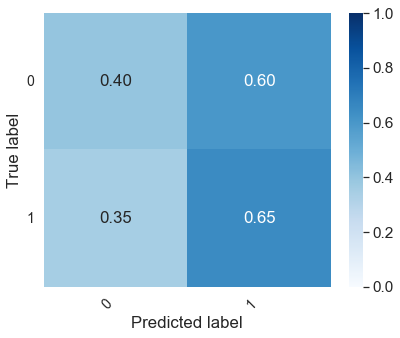

In [8]:
fig_train = result_generation.print_confusion_matrix("train",["0","1"])

Confusion matrix, without normalization


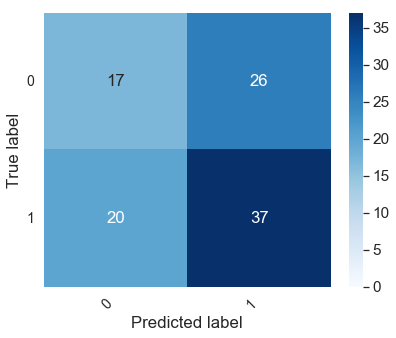

In [11]:
fig_train = result_generation.print_confusion_matrix("train",["0","1"],normalize=False)

Confusion matrix, without normalization


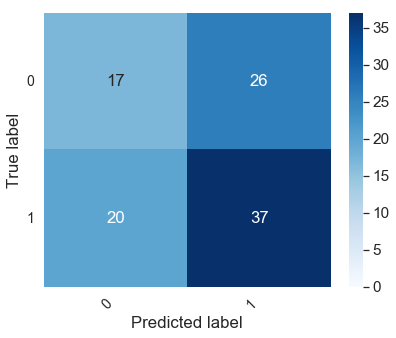

In [12]:
fig_train = result_generation.print_confusion_matrix("train",["0","1"],normalize=False,save_fig=True)

### plot roc curves of the results on the 3 datasets

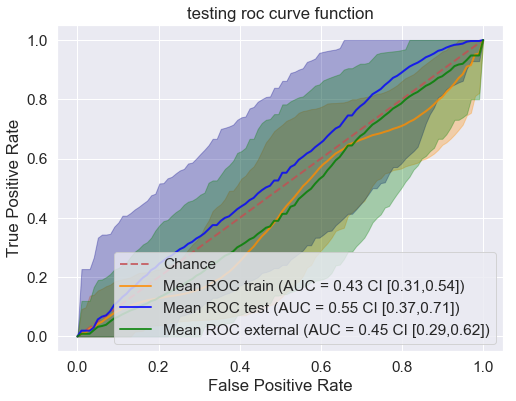

'testing roc curve function done'

In [13]:
result_generation.plot_roc_auc_ci(title ="testing roc curve function")